In [96]:
#Zadorozhnyy Dmitriy 3 group
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [97]:
data=pd.read_csv('winequality-red.csv') #at first let`s look for our dataset, and check it shape
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [98]:
data.info() #let`s check our dataset for NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


so we have not NaN values that is good

In [99]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [100]:
freq_qual=data['quality'].value_counts() 
data['quality'].value_counts(normalize=True)#here we can see, that the most frequent qualities: 5 and 6, the rarest: 3 and 8

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

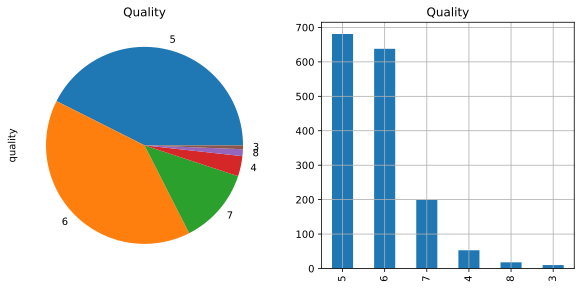

In [101]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
freq_qual.plot(kind="pie", title='Quality') #no need to specify for first axis
plt.subplot(2,2,2)
freq_qual.plot(kind="bar",title='Quality',grid=True) #we can see quality distribution on these charts

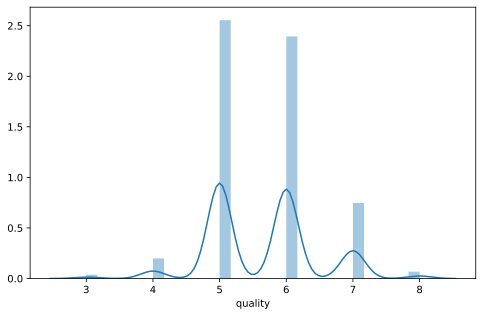

In [102]:
sns.distplot(data.quality)

In [103]:
data.groupby('quality').mean() # i think, that our target var is quality, so let`s group our dataset by quality
#so let`s see the chart of these data frame 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


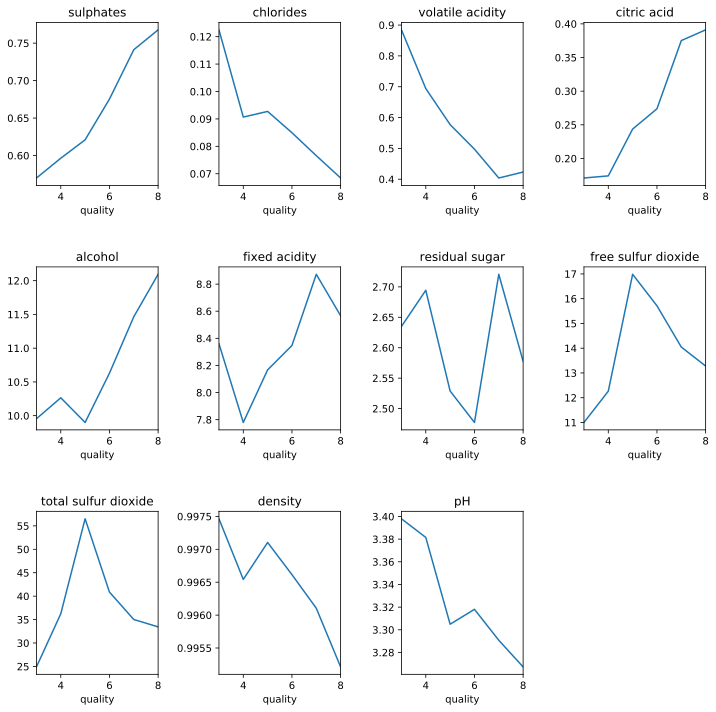

In [104]:
plt.figure(figsize=(12,12))
plt.subplot(3,4,1)
data.groupby('quality')['sulphates'].mean().plot(kind="line",title="sulphates")
plt.subplot(3,4,2)
data.groupby('quality')['chlorides'].mean().plot(kind="line",title="chlorides")
plt.subplot(3,4,3)
data.groupby('quality')['volatile acidity'].mean().plot(kind="line",title="volatile acidity")
plt.subplot(3,4,4)
data.groupby('quality')['citric acid'].mean().plot(kind="line",title="citric acid")
plt.subplot(3,4,5)
data.groupby('quality')['alcohol'].mean().plot(kind="line",title="alcohol")
plt.subplot(3,4,6)
data.groupby('quality')['fixed acidity'].mean().plot(kind="line",title="fixed acidity")
plt.subplot(3,4,7)
data.groupby('quality')['residual sugar'].mean().plot(kind="line",title="residual sugar")
plt.subplot(3,4,8)
data.groupby('quality')['free sulfur dioxide'].mean().plot(kind="line",title="free sulfur dioxide")
plt.subplot(3,4,9)
data.groupby('quality')['total sulfur dioxide'].mean().plot(kind="line",title="total sulfur dioxide")
plt.subplot(3,4,10)
data.groupby('quality')['density'].mean().plot(kind="line",title="density")
plt.subplot(3,4,11)
data.groupby('quality')['pH'].mean().plot(kind="line",title="pH")
plt.subplots_adjust(wspace=0.5, hspace=0.5)

From the graphics above we can see some addictions: 
1. higher **sulphates** -> higher **quality**.
2. less **chlorides** -> higher **quality**.
3. less **volatile acidity** -> higher **quality**.
4. higher **citric acid** -> higher **quality**.  
5. higher **alcohol** -> higher **quality** (but 4 is not affected)
6. maximum of **free sulfur dioxide** and **total sulfur dioxide** accounted for 5 **quailty**
7. less **density** -> higher **quality** (5 in not affected) 
8. less **ph** -> higher **quality** (6 is not affected)  

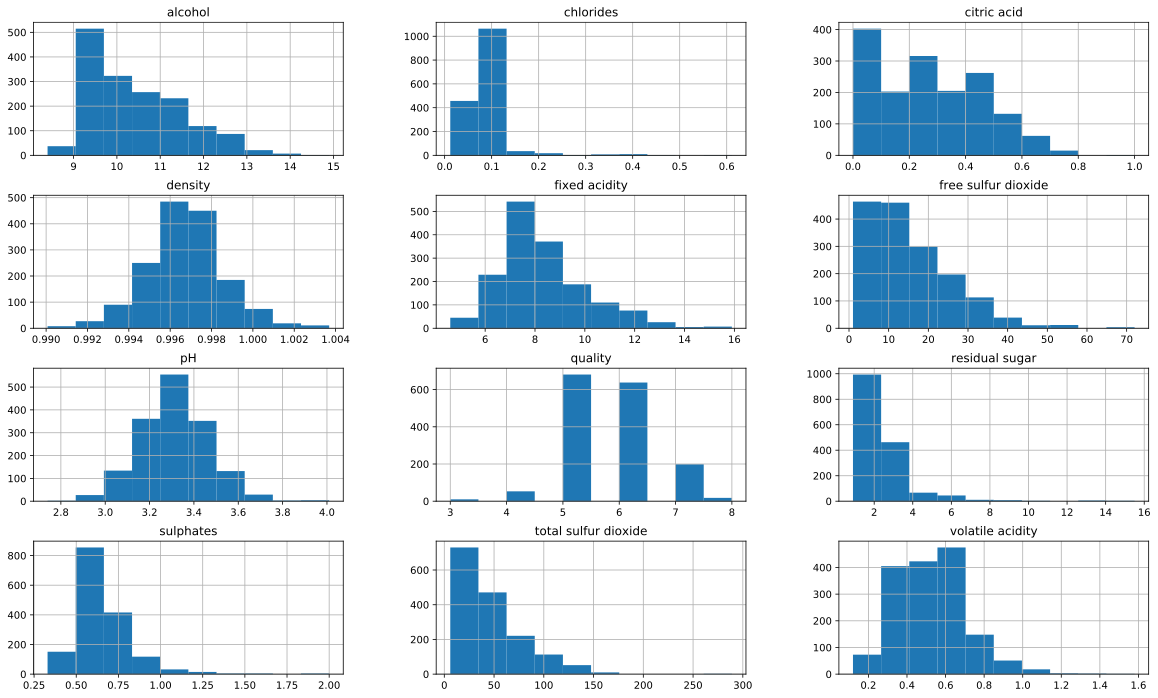

In [109]:
features = list(set(data.columns))
data[features].hist(figsize=(20,12));

In [105]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2) #i want to see correlation between signs

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.26,0.67,0.11,0.094,-0.15,-0.11,0.67,-0.68,0.18,-0.062,0.12
volatile acidity,-0.26,1,-0.55,0.0019,0.061,-0.011,0.076,0.022,0.23,-0.26,-0.2,-0.39
citric acid,0.67,-0.55,1,0.14,0.2,-0.061,0.036,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.0019,0.14,1,0.056,0.19,0.2,0.36,-0.086,0.0055,0.042,0.014
chlorides,0.094,0.061,0.2,0.056,1,0.0056,0.047,0.2,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.011,-0.061,0.19,0.0056,1,0.67,-0.022,0.07,0.052,-0.069,-0.051
total sulfur dioxide,-0.11,0.076,0.036,0.2,0.047,0.67,1,0.071,-0.066,0.043,-0.21,-0.19
density,0.67,0.022,0.36,0.36,0.2,-0.022,0.071,1,-0.34,0.15,-0.5,-0.17
pH,-0.68,0.23,-0.54,-0.086,-0.27,0.07,-0.066,-0.34,1,-0.2,0.21,-0.058
sulphates,0.18,-0.26,0.31,0.0055,0.37,0.052,0.043,0.15,-0.2,1,0.094,0.25


On this matrix we can see: (i will write only *high* (>=0.6) and *average* (>=0.3) correlations)
1. **fixed acidity**:  
*average* correlation with **citric acid**  
*high* correlation with **density**  
*high* correlation with **pH** (reverse)
2. **volatile acidity**:  
*average* corr with **citric acid** (reverse)  
3. **citric acid**:  
*average* corr with **density**  
*average* cor with **pH**   
*average* cor with **sulphates**
4. **residual sugar**:  
*average* corr with **density**  
5. **clorides**:  
*average* corr with **sulphates**  
5. **free sulfur dioxide**:  
*high* corr with **total sulfur dioxide**  
6. **density**:  
*average* corr with **alcohol**  

So what about our target var?
**quality** has some interesting correlations like:  
1. -0.39 with **volatile acidity** - Based on my charts and this value (-0.39), we can conclude that the higher **volatile acidity** value, the worse the quality of wine, and the **volatile acidity** itself depends on **citric acid** (-0.55).   Regarding **citric acid**, it weakly (0.23) affects the qualifications of our wine (i whink that 0.23 we get from correlation with **volatile acidity** (-0.55).  
2. 0.48 with **alcohol**






In [114]:
condition1=(data['quality']>4)
data.groupby(condition1).mean() # i think, that our target var is quality, so let`s group our dataset by quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality,,,,,,,,,,,,
False,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
True,8.338021,0.519766,0.274967,2.532813,0.087128,16.031250,46.960938,0.996749,3.308118,0.660853,10.431478,5.709635


Here we see how the signs look like for conditionally low **quality**: 3,4 and for the **quality**> = 5
There are some signs which heavily poured on our main valuer - **quality**.  
I think with my data analysis it will be more easy do the true classification of vines:)
Unfortunately i did not find new signs, but i tried:)